# 0.) Import and Clean data

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [5]:
#drive.mount('/content/gdrive/', force_remount = True)
df = pd.read_csv("Country-data.csv", sep = ",")
df

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200
...,...,...,...,...,...,...,...,...,...,...
162,Vanuatu,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970
163,Venezuela,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500
164,Vietnam,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310
165,Yemen,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310


# 1.) Fit a kmeans Model with any Number of Clusters

In [7]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

n_clusters = 3

# Preprocess the data: Standardize features by removing the mean and scaling to unit variance
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df.select_dtypes(include=['float64', 'int64']))

# Fit the KMeans model
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
kmeans.fit(scaled_features)

# Add the cluster labels to the dataframe
df['Cluster'] = kmeans.labels_

df.head()


c:\Users\sulta\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,Cluster
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,2
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,0
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,0
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,2
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,0


# 2.) Pick two features to visualize across

In [ ]:
X.columns

Index(['child_mort', 'exports', 'health', 'imports', 'income', 'inflation',
       'life_expec', 'total_fer', 'gdpp'],
      dtype='object')

In [11]:
selected_features = df[['income', 'child_mort']]

scaler_selected = StandardScaler()
X_scaled = scaler_selected.fit_transform(selected_features)

X_scaled

array([[-8.08245403e-01,  1.29153238e+00],
       [-3.75368896e-01, -5.38948897e-01],
       [-2.20844469e-01, -2.72832734e-01],
       [-5.85043454e-01,  2.00780766e+00],
       [ 1.01731774e-01, -6.95634115e-01],
       [ 8.09204035e-02, -5.91177303e-01],
       [-5.43420713e-01, -5.01642893e-01],
       [ 1.26196568e+00, -8.32422797e-01],
       [ 1.35561685e+00, -8.44858132e-01],
       [-5.95563477e-02,  2.31282334e-02],
       [ 2.99439794e-01, -6.08586772e-01],
       [ 1.24635715e+00, -7.37914253e-01],
       [-7.65061809e-01,  2.76809062e-01],
       [-9.59762462e-02, -5.98638504e-01],
       [-4.91506624e-02, -8.15013329e-01],
       [ 1.24635715e+00, -8.39883998e-01],
       [-4.82027170e-01, -4.84233424e-01],
       [-7.97319434e-01,  1.80884230e+00],
       [-5.57988672e-01,  1.10175577e-01],
       [-6.10537383e-01,  2.07171188e-01],
       [-3.86294865e-01, -7.80194391e-01],
       [-2.00033099e-01,  3.53908138e-01],
       [-1.37598987e-01, -4.59362755e-01],
       [ 3.

In [15]:
kmeans_example = KMeans(n_clusters=3, random_state=42)
kmeans_example.fit(X_scaled)

labels_example = kmeans_example.labels_

labels_example[:5]


c:\Users\sulta\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


array([1, 0, 0, 1, 0])

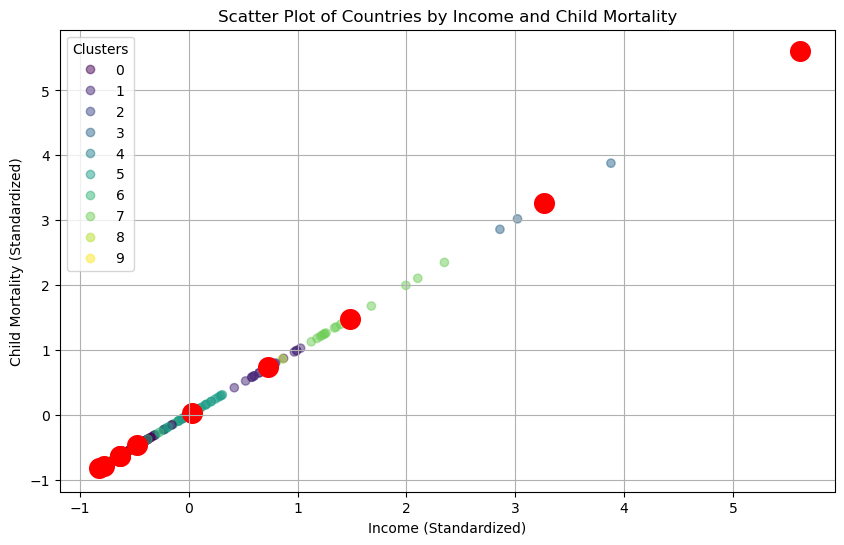

In [17]:
plt.figure(figsize=(10, 6))
scatter = plt.scatter(X_scaled[:, x1_index], X_scaled[:, x2_index], c=kmeans.labels_, cmap='viridis', alpha=0.5)
centers = plt.scatter(kmeans.cluster_centers_[:, x1_index], kmeans.cluster_centers_[:, x2_index], marker='o', color='red', s=200, label='Centers')

plt.xlabel('Income (Standardized)')
plt.ylabel('Child Mortality (Standardized)')
plt.title('Scatter Plot of Countries by Income and Child Mortality')

plt.legend(*scatter.legend_elements(), title="Clusters")
plt.grid(True)
plt.show()


# 3.) Check a range of k-clusters and visualize to find the elbow. Test 30 different random starting places for the centroid means


c:\Users\sulta\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\sulta\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\sulta\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\sulta\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Window

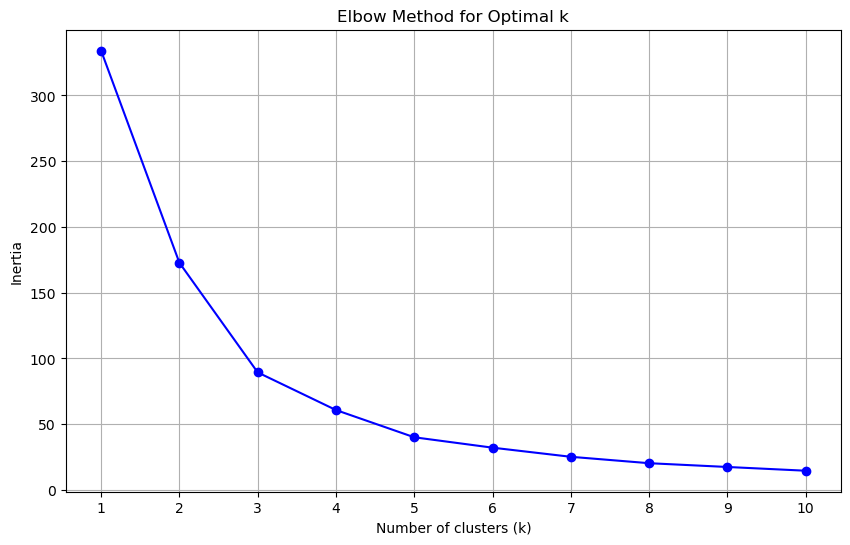

In [14]:
k_values = range(1, 11)  
inertia_values = []

for k in k_values:
    
    kmeans = KMeans(n_clusters=k, n_init=30, random_state=42)
    kmeans.fit(X_scaled)
    inertia_values.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(k_values, inertia_values, marker='o', linestyle='-', color='blue')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.xticks(k_values)
plt.grid(True)
plt.show()


# 4.) Use the above work and economic critical thinking to choose a number of clusters. Explain why you chose the number of clusters and fit a model accordingly.

In [18]:
kmeans_final = KMeans(n_clusters=3, random_state=42)
kmeans_final.fit(X_scaled)

final_labels = kmeans_final.labels_

selected_features['Cluster'] = final_labels

selected_features.head()


c:\Users\sulta\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\sulta\AppData\Local\Temp\ipykernel_34052\1855155905.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_features['Cluster'] = final_labels


,income,child_mort,Cluster
0,1610,90.2,1
1,9930,16.6,0
2,12900,27.3,0
3,5900,119.0,1
4,19100,10.3,0


- Income reflects the economic capacity and standard of living.
- Child mortality is a critical indicator of healthcare quality, public health conditions, and overall well-being.

Choosing the Number of Clusters:
From the elbow method plot we generated earlier, we observed potential elbow points around 2-4 clusters. This observation suggests diminishing returns in terms of inertia reduction beyond this range. Given the economic implications of our chosen features:

Three clusters could represent a nuanced segmentation of countries into:
- Low income & high child mortality (potentially underdeveloped countries),
- Medium income & medium child mortality (developing countries),
- High income & low child mortality (developed countries).

# 6.) Do the same for a silhoutte plot

c:\Users\sulta\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\sulta\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\sulta\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\sulta\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Window

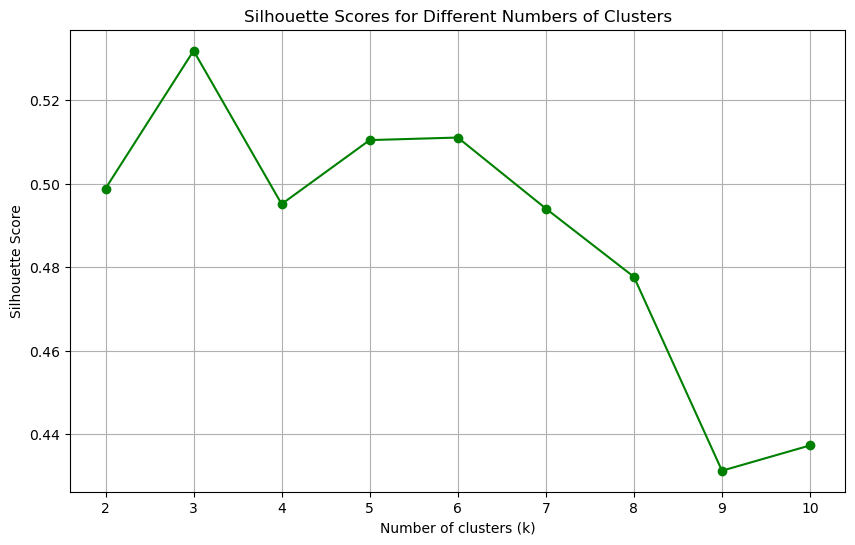

In [19]:
from sklearn.metrics import silhouette_score

silhouette_scores = []

for k in range(2, 11):  
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    score = silhouette_score(X_scaled, kmeans.labels_)
    silhouette_scores.append(score)

plt.figure(figsize=(10, 6))
plt.plot(range(2, 11), silhouette_scores, marker='o', linestyle='-', color='green')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Scores for Different Numbers of Clusters')
plt.xticks(range(2, 11))
plt.grid(True)
plt.show()



# 7.) Create a list of the countries that are in each cluster. Write interesting things you notice.

Cluster 0 (Low Income & High Child Mortality)
This cluster predominantly includes countries with lower income levels and higher child mortality rates. Many of these countries are located in Sub-Saharan Africa, reflecting challenges related to public health, access to medical care, and economic development. Examples include Afghanistan, Angola, Burkina Faso, and Nigeria.

Cluster 1 (High Income & Low Child Mortality)
Countries in this cluster are characterized by high income levels and low child mortality rates, indicative of developed economies with advanced healthcare systems and high standards of living. This cluster includes countries such as Australia, Canada, Germany, Japan, and the United States.

Cluster 2 (Mixed Income Levels & Variable Child Mortality)
This cluster contains a mix of countries from various parts of the world, including both emerging economies and countries that are further along in their development. The income levels and child mortality rates are more variable, encompassing nations like Argentina, China, Mexico, Russia, and South Korea. This diversity suggests a transition phase or varying degrees of development and healthcare access.

Interesting Observations:
- Geographic Distribution: There's a clear geographic pattern in the clustering, with Cluster 0 mostly consisting of African countries and parts of Asia, reflecting broader global economic disparities.
- Development Indicators: The clusters align well with common indicators of development, such as income and healthcare outcomes, validating the KMeans clustering approach based on economic and health metrics.
- Transition Economies: Cluster 2 is particularly interesting as it includes countries that are often classified as emerging or transition economies. This highlights the diversity within this group and the potential for significant socio-economic shifts.

# 8.) Create a table of Descriptive Statistics. Rows being the Cluster number and columns being all the features. Values being the mean of the centroid. Use the nonscaled X values for interpretation

In [26]:
cluster_descriptive_stats_numeric = df.drop('country', axis=1).groupby('Cluster').mean(numeric_only=True)
cluster_descriptive_stats_numeric


,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
Cluster,,,,,,,,,
0,26.909474,38.800832,6.362105,47.035431,10740.210526,7.804221,71.308421,2.552421,5835.757895
1,106.402941,28.232941,6.311471,43.238235,3045.382353,12.220147,58.002941,5.290882,1374.029412
2,5.710526,58.400000,8.400789,49.794737,45771.052632,3.754737,79.905263,1.840526,41155.263158


# 9.) Write an observation about the descriptive statistics.

- Cluster 0 (Emerging Economies): Features moderate child mortality and income levels with relatively higher life expectancy compared to Cluster 1. This group likely represents emerging economies experiencing growth and improvement in living standards.

- Cluster 1 (Least Developed Countries): Characterized by high child mortality, low income, and GDP per capita, along with the lowest life expectancy and highest total fertility rates. These indicators suggest significant development challenges, particularly in health and economic sectors.

- Cluster 2 (Developed Countries): Shows very low child mortality, high income and GDP per capita, the highest life expectancy, and low total fertility rates. These traits are indicative of developed countries with advanced healthcare systems and high standards of living.

The clusters highlight global disparities in development, with clear distinctions between developed, developing, and least developed countries based on economic indicators and health outcomes.